<center>
    <h1>Tarea 3 ANN</h1>
    <h2>Recurrent Neural Networks</h2>
    <br>
    <h3>Diego Pérez - 201173045-3</h3>
    <h3>Ariel Sanhueza - ROL</h3>
</center>

### Importar modulos a utilizar

In [1]:
import numpy as np
from theano.tensor.shared_randomstreams import RandomStreams

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasRegressor
from keras.datasets import imdb
from keras.preprocessing import sequence

import matplotlib.pyplot as plt

%matplotlib inline

Using Theano backend.


### RNN en análisis de sentimientos

#### a) Cargar dataset IMDB

In [9]:
np.random.seed(3)
RandomStreams(8)

(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=15)

print(X_train.shape, X_test.shape)

(25000,) (25000,)


#### b) Análisis del dataset

# Palabras dataset:  50000


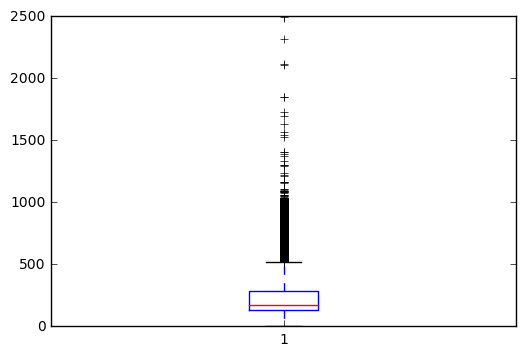

In [10]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print('# Palabras dataset: ', X.size)

result = list(map(len, X))
plt.boxplot(result)
plt.show()

del X, y

#### c) Padding

In [11]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=5000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

print(X_train.shape, X_test.shape)

(25000, 500) (25000, 500)


#### d) LSTM con embedding

Word embedding es una técnica común en el procesamiento natural del lenguaje, donde palabras (o frases) son mapeadas a un espacio de vectores de números reales. El dataset IMDB viene preprocesado, asignando a cada palabra un entero positivo, que además indica el ranking de frecuencia de aparición en el dataset. 

En Keras, se puede realizar el word embedding mediante una capa destinada a este propósito, que sólo se puede agregar inmediatamente después de la capa de entrada (Input). Como resultado se obtienen entradas en el espacio de vectores de dimensión d, eg. (25000, 500) -> (25000, 500, d). Se experimentará con distintos valores de d.

d=32

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_2 (Embedding)          (None, 500, 32)       160000      embedding_input_4[0][0]          
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 100)           53200       embedding_2[0][0]                
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             101         lstm_2[0][0]                     
Total params: 213301
____________________________________________________________________________________________________


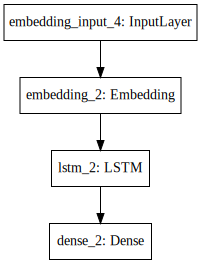

In [14]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb32.h5')

#### Resultados

Precisión de clasificación

In [13]:
model = load_model('RNN-lstm-emb32.h5')
score_emb32 = model.evaluate(X_test, y_test, verbose=0)
print('Precisión de clasificación LSTM 32-vector embedding: ', score_emb32[1])

Precisión de clasificación LSTM 32-vector embedding:  0.85656


#### e) Probar con distintos d

d=16

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_3 (Embedding)          (None, 500, 16)       80000       embedding_input_5[0][0]          
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 100)           46800       embedding_3[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             101         lstm_3[0][0]                     
Total params: 126901
____________________________________________________________________________________________________


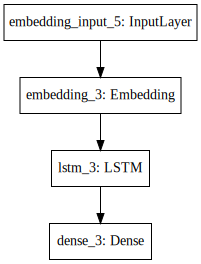

In [15]:
embedding_vector_length = 16
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Resultados

Precisión de Clasificación

In [16]:
model = load_model('RNN-lstm-emb16.h5')
score_emb16 = model.evaluate(X_test, y_test, verbose=0)
print('Precisión de clasificación LSTM 16-vector embedding: ', score_emb16[1])

Precisión de clasificación LSTM 16-vector embedding:  0.86968


d=64

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_4 (Embedding)          (None, 500, 64)       320000      embedding_input_7[0][0]          
____________________________________________________________________________________________________
lstm_4 (LSTM)                    (None, 100)           66000       embedding_4[0][0]                
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1)             101         lstm_4[0][0]                     
Total params: 386101
____________________________________________________________________________________________________


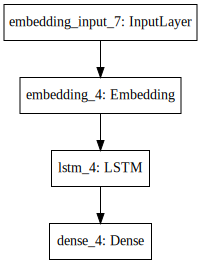

In [17]:
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Resultados

Precisión de Clasificación

In [18]:
model = load_model('RNN-lstm-emb64.h5')
score_emb64 = model.evaluate(X_test, y_test, verbose=0)
print('Precisión de clasificación LSTM 64-vector embedding: ', score_emb64[1])

Precisión de clasificación LSTM 64-vector embedding:  0.86508


#### Comparación

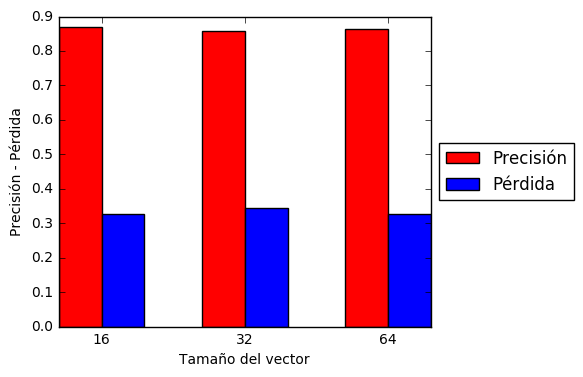

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Precisión - Pérdida')
ax.set_xlabel('Tamaño del vector')
ax.set_xticks(np.array([0,1,2]) + 0.3)
ax.set_xticklabels(np.array([16,32,64]).astype('str'))

ax.bar(np.arange(0,3), [score_emb16[1], score_emb32[1], score_emb64[1]], width=0.3, color='red', label='Precisión')
ax.bar(np.arange(0.3, 3.3), [score_emb16[0], score_emb32[0], score_emb64[0]], width=0.3, label='Pérdida')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Parece no tener efecto el tamaño del vector en el rendimiento de la red. Es posible que la tendencia al overfitting  del modelo (razón por la cual se entrena solo 3 epochs) no permita obtener las diferencias de precisión entre los distintos tamaños de vector.
Para este experimento se utilizaron las 5000 palabras top del dataset, esto quiere decir, que para todos los samples, cualquier palabra fuera de las 5000 más frecuentes, se reemplazará por un cero. De cierta forma, este paso realizó una extracción de características, que no sabemos si es óptima. 
Aumentar o disminuir el número de palabras top cambia los descriptores, y por lo tanto puede ocultar o revelar ciertas relaciones que posiblemente son útiles para la clasificación. Entonces, antes de atacar el problema del overfitting, se experimentará con el número de palabras top, y su relación con el tamaño del vector.

#### f) Variar las palabras top

#### top_words=3000

In [24]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=3000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

d=16

In [ ]:
embedding_vector_length = 16
model = Sequential()
model.add(Embedding(3000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb16-word3000.h5')

d=32

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(3000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb32-word3000.h5')

d=64

In [ ]:
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(3000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb64-word3000.h5')

#### Resultados

Precisión de Clasificación

In [ ]:
score_word3000_train = np.array([])
score_word3000_test = np.array([])
model = load_model('RNN-lstm-emb16-word3000.h5')
score_word3000_train = np.append(score_word3000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word3000_test = np.append(score_word3000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb32-word3000.h5')
score_word3000_train = np.append(score_word3000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word3000_test = np.append(score_word3000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb64-word3000.h5')
score_word3000_train = np.append(score_word3000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word3000_test = np.append(score_word3000_test, model.evaluate(X_test, y_test, verbose=0)[1])

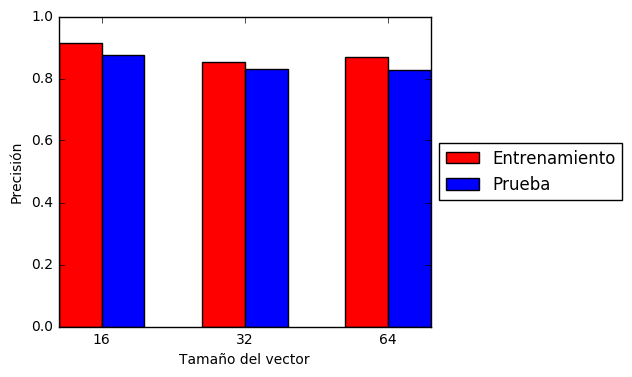

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Precisión')
ax.set_xlabel('Tamaño del vector')
ax.set_xticks(np.array([0,1,2]) + 0.3)
ax.set_xticklabels(np.array([16,32,64]).astype('str'))

ax.bar(np.arange(0,3), score_word3000_train, width=0.3, color='red', label='Entrenamiento')
ax.bar(np.arange(0.3, 3.3), score_word3000_test, width=0.3, label='Prueba')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### top_words=8000

In [26]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=8000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

d=16

In [ ]:
embedding_vector_length = 16
model = Sequential()
model.add(Embedding(8000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb16-word8000.h5')

d=32

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(8000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb32-word8000.h5')

d=64

In [ ]:
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(8000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb64-word8000.h5')

#### Resultados

Precisión de Clasificación

In [28]:
score_word8000_train = np.array([])
score_word8000_test = np.array([])
model = load_model('RNN-lstm-emb16-word8000.h5')
score_word8000_train = np.append(score_word8000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word8000_test = np.append(score_word8000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb32-word8000.h5')
score_word8000_train = np.append(score_word8000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word8000_test = np.append(score_word8000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb64-word8000.h5')
score_word8000_train = np.append(score_word8000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word8000_test = np.append(score_word8000_test, model.evaluate(X_test, y_test, verbose=0)[1])

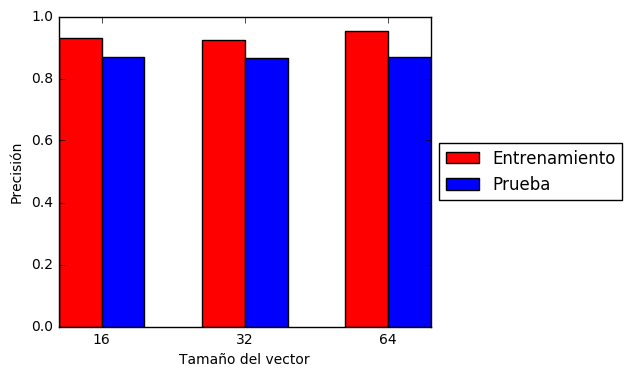

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Precisión')
ax.set_xlabel('Tamaño del vector')
ax.set_xticks(np.array([0,1,2]) + 0.3)
ax.set_xticklabels(np.array([16,32,64]).astype('str'))

ax.bar(np.arange(0,3), score_word8000_train, width=0.3, color='red', label='Entrenamiento')
ax.bar(np.arange(0.3, 3.3), score_word8000_test, width=0.3, label='Prueba')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### top_words=15000

In [30]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=15000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

d=16

In [ ]:
embedding_vector_length = 16
model = Sequential()
model.add(Embedding(15000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb16-word15000.h5')

d=32

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(15000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb32-word15000.h5')

d=64

In [ ]:
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(15000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb64-word15000.h5')

#### Resultados

Precisión de Clasificación

In [31]:
score_word15000_train = np.array([])
score_word15000_test = np.array([])
model = load_model('RNN-lstm-emb16-word15000.h5')
score_word15000_train = np.append(score_word15000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word15000_test = np.append(score_word15000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb32-word15000.h5')
score_word15000_train = np.append(score_word15000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word15000_test = np.append(score_word15000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb64-word15000.h5')
score_word15000_train = np.append(score_word15000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word15000_test = np.append(score_word15000_test, model.evaluate(X_test, y_test, verbose=0)[1])

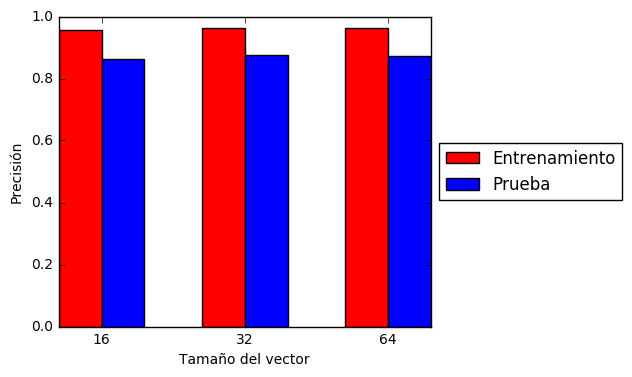

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Precisión')
ax.set_xlabel('Tamaño del vector')
ax.set_xticks(np.array([0,1,2]) + 0.3)
ax.set_xticklabels(np.array([16,32,64]).astype('str'))

ax.bar(np.arange(0,3), score_word15000_train, width=0.3, color='red', label='Entrenamiento')
ax.bar(np.arange(0.3, 3.3), score_word15000_test, width=0.3, label='Prueba')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### top_words=20000

In [33]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=20000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

d=16

In [ ]:
embedding_vector_length = 16
model = Sequential()
model.add(Embedding(20000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb16-word20000.h5')

d=32

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb32-word20000.h5')

d=64

In [ ]:
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(20000, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save('RNN-lstm-emb64-word20000.h5')

#### Resultados

Precisión de Clasificación

In [34]:
score_word20000_train = np.array([])
score_word20000_test = np.array([])
model = load_model('RNN-lstm-emb16-word20000.h5')
score_word20000_train = np.append(score_word20000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word20000_test = np.append(score_word20000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb32-word20000.h5')
score_word20000_train = np.append(score_word20000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word20000_test = np.append(score_word20000_test, model.evaluate(X_test, y_test, verbose=0)[1])
model = load_model('RNN-lstm-emb64-word20000.h5')
score_word20000_train = np.append(score_word20000_train, model.evaluate(X_train, y_train, verbose=0)[1])
score_word20000_test = np.append(score_word20000_test, model.evaluate(X_test, y_test, verbose=0)[1])

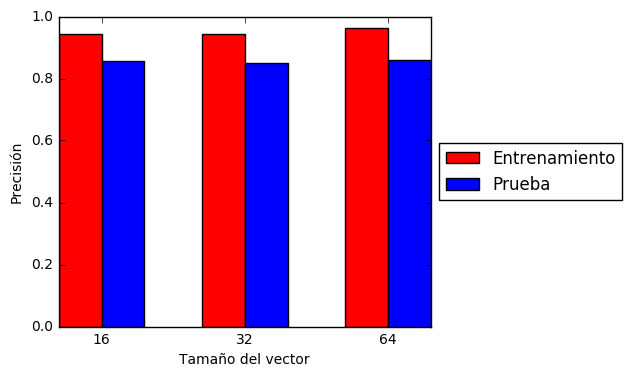

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Precisión')
ax.set_xlabel('Tamaño del vector')
ax.set_xticks(np.array([0,1,2]) + 0.3)
ax.set_xticklabels(np.array([16,32,64]).astype('str'))

ax.bar(np.arange(0,3), score_word20000_train, width=0.3, color='red', label='Entrenamiento')
ax.bar(np.arange(0.3, 3.3), score_word20000_test, width=0.3, label='Prueba')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Comparación

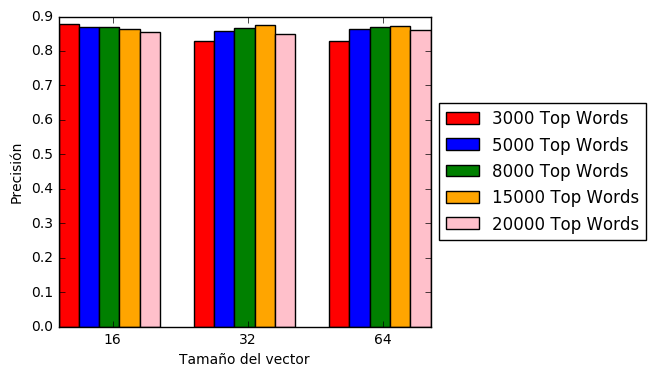

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Precisión')
ax.set_xlabel('Tamaño del vector')
ax.set_xticks(np.array([0,1,2]) + 0.4)
ax.set_xticklabels(np.array([16,32,64]).astype('str'))

ax.bar(np.arange(0,3), score_word3000_test, width=0.15, color='red', label='3000 Top Words')
ax.bar(np.arange(0.15, 3.15), [score_emb16[1], score_emb32[1], score_emb64[1]], width=0.15, label='5000 Top Words')
ax.bar(np.arange(0.3, 3.3), score_word8000_test, width=0.15, color='green', label='8000 Top Words')
ax.bar(np.arange(0.45, 3.45), score_word15000_test, width=0.15, color='orange', label='15000 Top Words')
ax.bar(np.arange(0.6, 3.6), score_word20000_test, width=0.15, color='pink', label='20000 Top Words')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Se puede observar que para un tamaño de vector 16, se obtienen mejores resultados con un menor número de palabras top. Al aumentar el tamaño, la clasificación es mejor a medida que se aumenta el número de palabras top. No parece haber diferencias entre los vectores de 32 y 64 dimensiones. Podemos concluir que al tener un menor número de palabras en el diccionario, es posible utilizar vectores de menor dimensión para hacer un mapeo óptimo entre los espacios. En cambio, con un diccionario grande, es necesario usar vectores de mayor tamaño.

Los mejores resultados se obtuvieron con top_words=3000 + d=16 y con top_words=15000 + d=32.

#### g) Dropout

Para mitigar el problema de overfitting se experimentará con Dropout, que es un método de regularización creado con este objetivo. La noción básica de su funcionamiento es que se desactivan aleatoriamente un número de unidades (ocultas o visibles) y sus conecciones durante el entrenamiento, con el objetivo de evitar que éstas se co-adapten mucho.

El modelo propuesto en el enunciado se entrena a continuación, usando word embedding de tamaño 32 y 5000 palabras top.

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=5000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
score_dropout_1 = model.evaluate(X_test, y_test, verbose=0)

#### Resultados

Precisión de Clasificación